<h1 align="center" class="jp-toc-ignore" style="color: LightSeaGreen">Coder Mê Tài Chính</h1>

---
<table width="100%" style="border:0px;">
    <tr style="font-size: 14pt">
        <td><b>Evangelist:</b> Lê Minh Đạt</td>
        <td><b>Email:</b> <a href="mailto:sirminhdat@gmail.com">sirminhdat@gmail.com</a></td>
        <td><b>Zalo:</b> 0919 564 515</td>
    </tr>
</table>

<center><h1 class="jp-toc-ignore"><b>Python For Finance (Py4Fin)</b></h1></center>

<center>
    <h2 style="margin-bottom:0px;" class="jp-toc-ignore">BÀI 3</h2>
    <h1 style="color: Crimson; margin-top:10px;">Pandas Cơ Bản</h1>
</center>

**Nội dung:**
1. Pandas là gì? Cài đặt
2. Series
3. DataFrames
4. Tạo DataFrame từ file csv/json
5. Filter dữ liệu
6. Missing Values
7. Một số hàm thao tác trên dòng, cột trong Pandas

---

<h2 style="color: blue">1. Pandas là gì? Cài đặt</h2>

Pandas là một thư viện được build dựa trên thư viện NumPy. Pandas hổ trợ người dùng xử lý dữ liệu dạng bảng (Table có dòng, cột) cũng như dữ liệu dạng chuỗi thời gian (Time Series).

Pandas là viết tắt của cụm từ **Pan**el **Da**ta. Trong kinh tế lượng (Econometrics), Panel Data nghĩa là "Dữ liệu có cấu trúc đa chiều" (Multidimensional structured data)

Để cài đặt Pandas, ta dùng lệnh:

**pip install pandas**

Để sử dụng Pandas, ta dùng lệnh import:

**import** package_name **as** alias_name

In [4]:
import pandas as pd
import numpy as np

<h2 style="color: blue">2. Series</h2>

Series trong Pandas cũng giống như mảng của NumPy. Chỉ có khác biệt là Series có thể thay đổi index (thêm label) của các phần tử còn mảng trong NumPy thì không

<h3 style="color: blue">2.1. Tạo Series với default index</h3>

In [5]:
# Tạo series từ tuple
s1 = pd.Series((1, 2, 3)) 
print(s1)

# Tạo series từ list
s2 = pd.Series([4, 5, 6]) 
print(s2)

0    1
1    2
2    3
dtype: int64
0    4
1    5
2    6
dtype: int64


<h3 style="color: blue">2.2. Tạo Series với custom index (label)</h3>

In [6]:
# Gán label cho các phần tử trong Series
my_list = ["Cyan", "Magenta", "Yellow", "Black"]
my_labels = ["C", "M", "W", "K"]
ser_cmyk = pd.Series(data=my_list, index=my_labels)
ser_cmyk

C       Cyan
M    Magenta
W     Yellow
K      Black
dtype: object

<h3 style="color: blue">2.3. Tạo Series từ array của NumPy</h3>

In [7]:
# Tạo series từ numpy array
arr = np.array([45, 78, 89, 34, 15])
s3 = pd.Series(arr, index=['a', 'b', 'c', 'd', 'e'])
s3

a    45
b    78
c    89
d    34
e    15
dtype: int32

<h3 style="color: blue">2.4. Tạo Series từ dictionary</h3>

In [9]:
# Tạo series từ dictionary
s4 = pd.Series(data={'a':33, 'b':44, 'c':88, 'd':22, 'e':77}, name="values")
s4

a    33
b    44
c    88
d    22
e    77
Name: values, dtype: int64

In [10]:
# Reset index
s4.reset_index()

,index,values
0,a,33
1,b,44
2,c,88
3,d,22
4,e,77


<h3 style="color: blue">2.5. Truy xuất phần tử trong Series</h3>

In [13]:
print(ser_cmyk)
# Truy xuất series bằng index number
print(ser_cmyk[0])

# Truy xuất series bằng custom index
print(ser_cmyk['C'])

# Slicing một sub-series trong 1 series
print(s4[:3])
print(s4[2:4])

C       Cyan
M    Magenta
W     Yellow
K      Black
dtype: object
Cyan
Cyan
a    33
b    44
c    88
Name: values, dtype: int64
c    88
d    22
Name: values, dtype: int64


<h2 style="color: blue">3. DataFrame</h2>

DataFrame được hiểu như là một kiểu dữ liệu dạng table (dòng, cột). Mỗi dòng, cột đều có thể gán cho một label (index). Nôm na là dữ liệu dạng bảng giống như Excel vậy

<!-- 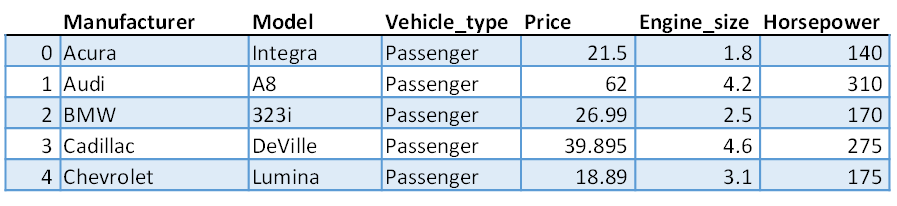 -->
<!-- 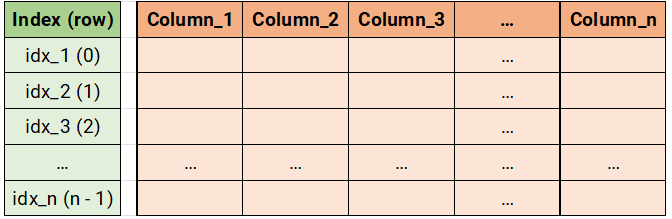 -->
<center>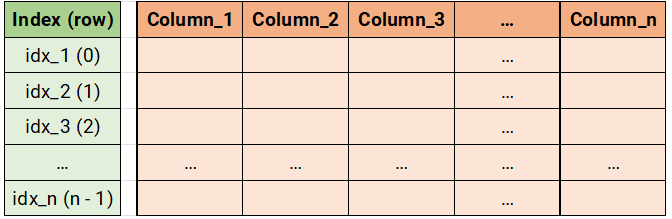</center>

<h3 style="color: blue">3.1. Tạo DataFrame</h3>

In [14]:
# Tạo Dataframe từ numpy array
np.random.seed(2023)
matrix = np.random.randint(-10, 20, [5, 5])
df1 = pd.DataFrame(
    data = matrix,
    index = "I II III IV V".split(' '),
    columns = "A B C D E".split(' ')
)
df1

,A,B,C,D,E
I,13,15,-4,13,-9
II,18,-7,10,10,12
III,-5,-10,12,7,5
IV,11,5,3,-3,-5
V,14,8,-7,16,18


In [15]:
#Tạo Dataframe từ một dictionary
dict1 = {
    'Employee': ["Vincent", "Peter", "Tom", "Joe", "Michael"],
    'YoE': [4, 5, 2, 7, 3],
    'Salary': [3500, 6000, 1000, 8000, 2700]
}
df2 = pd.DataFrame(data=dict1)
df2

,Employee,YoE,Salary
0,Vincent,4,3500
1,Peter,5,6000
2,Tom,2,1000
3,Joe,7,8000
4,Michael,3,2700


In [16]:
# Tạo DataFrame rỗng
empty_df = pd.DataFrame()
print(empty_df)

Empty DataFrame
Columns: []
Index: []


In [19]:
# Kiểm tra DataFrame có rỗng hay không
if empty_df.empty:
    print("Empty")
else:
    print("Not Empty")

Empty


<h3 style="color: blue">3.2. Mô tả thống kê cơ bản của một Dataframe</h3>

In [20]:
df1.describe()

,A,B,C,D,E
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,10.200000,2.200000,2.800000,8.600000,4.200000
std,8.871302,10.473777,8.348653,7.300685,11.300442
min,-5.000000,-10.000000,-7.000000,-3.000000,-9.000000
25%,11.000000,-7.000000,-4.000000,7.000000,-5.000000
50%,13.000000,5.000000,3.000000,10.000000,5.000000
75%,14.000000,8.000000,10.000000,13.000000,12.000000
max,18.000000,15.000000,12.000000,16.000000,18.000000


<h3 style="color: blue">3.3. Thông tin của một tập dữ liệu DataFrame</h3>

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Employee  5 non-null      object
 1   YoE       5 non-null      int64 
 2   Salary    5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


<h3 style="color: blue">3.5. Thêm cột mới</h3>

In [22]:
df1

,A,B,C,D,E
I,13,15,-4,13,-9
II,18,-7,10,10,12
III,-5,-10,12,7,5
IV,11,5,3,-3,-5
V,14,8,-7,16,18


In [23]:
df1['F'] = df1['A'] * df1['E']
df1

,A,B,C,D,E,F
I,13,15,-4,13,-9,-117
II,18,-7,10,10,12,216
III,-5,-10,12,7,5,-25
IV,11,5,3,-3,-5,-55
V,14,8,-7,16,18,252


In [24]:
#Dùng hàm concat để thêm cột mới là Series
new_col = pd.Series(
    data=[55, 77, 88, 90, 23], 
    index='I II III IV V'.split(), 
    name='G'
)
pd.concat([df1, new_col], axis=1) #Default axis=0: concat dòng. axis=1: concat cột

,A,B,C,D,E,F,G
I,13,15,-4,13,-9,-117,55
II,18,-7,10,10,12,216,77
III,-5,-10,12,7,5,-25,88
IV,11,5,3,-3,-5,-55,90
V,14,8,-7,16,18,252,23


In [27]:
#Dùng hàm concat để thêm cột mới là Dataframe
new_df = pd.DataFrame(
    data=[55, 77, 88, 90, 23],
    index='I II III IV V'.split(), 
    columns=['G']
)

print(new_df)

pd.concat([df1, new_df], axis=1)

      G
I    55
II   77
III  88
IV   90
V    23


,A,B,C,D,E,F,G
I,13,15,-4,13,-9,-117,55
II,18,-7,10,10,12,216,77
III,-5,-10,12,7,5,-25,88
IV,11,5,3,-3,-5,-55,90
V,14,8,-7,16,18,252,23


<h3 style="color: blue">3.6. Thêm dòng mới</h3>

In [28]:
# Append dòng mới là một dictionary
df1.append({'A': 12, 'B': 13, 'C': 7, 'D': 16, 'E':11, 'F': 14}, ignore_index=True)

C:\Users\Vincent\AppData\Local\Temp\ipykernel_23788\1609875254.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append({'A': 12, 'B': 13, 'C': 7, 'D': 16, 'E':11, 'F': 14}, ignore_index=True)


,A,B,C,D,E,F
0,13,15,-4,13,-9,-117
1,18,-7,10,10,12,216
2,-5,-10,12,7,5,-25
3,11,5,3,-3,-5,-55
4,14,8,-7,16,18,252
5,12,13,7,16,11,14


In [29]:
# Append dòng mới là một dataframe
df3 = pd.DataFrame(
    data={'A': 110, 'B': 220, 'C': 440, 'D': 770, 'E':550, 'F': 880}, 
    index=['VI']
)
print(df3)

df1.append(df3)

      A    B    C    D    E    F
VI  110  220  440  770  550  880


C:\Users\Vincent\AppData\Local\Temp\ipykernel_23788\905128188.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df3)


,A,B,C,D,E,F
I,13,15,-4,13,-9,-117
II,18,-7,10,10,12,216
III,-5,-10,12,7,5,-25
IV,11,5,3,-3,-5,-55
V,14,8,-7,16,18,252
VI,110,220,440,770,550,880


In [30]:
# Dùng hàm concat
pd.concat([df1, df3], axis=0) # axis=0: concat dòng

,A,B,C,D,E,F
I,13,15,-4,13,-9,-117
II,18,-7,10,10,12,216
III,-5,-10,12,7,5,-25
IV,11,5,3,-3,-5,-55
V,14,8,-7,16,18,252
VI,110,220,440,770,550,880


In [32]:
# Dùng hàm concat, bỏ qua index
df4 = pd.DataFrame(
    data=[{'A': 110, 'B': 220, 'C': 440, 'D': 770, 'E':550, 'F': 880}]
)
print(df4)
pd.concat([df1, df4], axis=0, ignore_index=True)

     A    B    C    D    E    F
0  110  220  440  770  550  880


,A,B,C,D,E,F
0,13,15,-4,13,-9,-117
1,18,-7,10,10,12,216
2,-5,-10,12,7,5,-25
3,11,5,3,-3,-5,-55
4,14,8,-7,16,18,252
5,110,220,440,770,550,880


In [38]:
# Dùng loc để append list hoặc dict
np.random.seed(2023)
df5 = pd.DataFrame(
    data = np.random.randint(-10, 20, [5, 5]),
    columns = ['A', 'B', 'C', 'D', 'E'],
    index=['I', 'II', 'III', 'IV', 'V']
)
print(df5, end='\n\n')

df5.loc[5] = [100, 200, 300 ,400, 500]
df5.loc[6] = {'A': 122, 'B': 133, 'C': 144 , 'D': 155 , 'E': 166}
print(df5)

      A   B   C   D   E
I    13  15  -4  13  -9
II   18  -7  10  10  12
III  -5 -10  12   7   5
IV   11   5   3  -3  -5
V    14   8  -7  16  18

       A    B    C    D    E
I     13   15   -4   13   -9
II    18   -7   10   10   12
III   -5  -10   12    7    5
IV    11    5    3   -3   -5
V     14    8   -7   16   18
5    100  200  300  400  500
6    122  133  144  155  166


<h3 style="color: blue">3.7. Xóa một hoặc nhiều cột/dòng</h3>

In [42]:
df1.drop(labels=['F','E'], axis=1) # Drop theo column

,A,B,C,D
I,13,15,-4,13
II,18,-7,10,10
III,-5,-10,12,7
IV,11,5,3,-3
V,14,8,-7,16


In [45]:
df1.drop(labels=['I', 'III'], axis=0) # Drop theo index

,A,B,C,D,E,F
II,18,-7,10,10,12,216
IV,11,5,3,-3,-5,-55
V,14,8,-7,16,18,252


In [47]:
dfR = df1.reset_index()
dfR

,index,A,B,C,D,E,F
0,I,13,15,-4,13,-9,-117
1,II,18,-7,10,10,12,216
2,III,-5,-10,12,7,5,-25
3,IV,11,5,3,-3,-5,-55
4,V,14,8,-7,16,18,252


In [48]:
dfR.drop(labels=[0, 2], axis=0)

,index,A,B,C,D,E,F
1,II,18,-7,10,10,12,216
3,IV,11,5,3,-3,-5,-55
4,V,14,8,-7,16,18,252


In [49]:
"""
Drop theo cột, 
không tạo dataframe mới mà xóa cột F trong df luôn
"""
df6 = df1.copy()
print(df6)

df6.drop('F', axis=1, inplace=True)
df6

      A   B   C   D   E    F
I    13  15  -4  13  -9 -117
II   18  -7  10  10  12  216
III  -5 -10  12   7   5  -25
IV   11   5   3  -3  -5  -55
V    14   8  -7  16  18  252


,A,B,C,D,E
I,13,15,-4,13,-9
II,18,-7,10,10,12
III,-5,-10,12,7,5
IV,11,5,3,-3,-5
V,14,8,-7,16,18


<h3 style="color: blue">3.8. Reset index</h3>

In [50]:
df7 = df1.copy()
df7

,A,B,C,D,E,F
I,13,15,-4,13,-9,-117
II,18,-7,10,10,12,216
III,-5,-10,12,7,5,-25
IV,11,5,3,-3,-5,-55
V,14,8,-7,16,18,252


In [51]:
df7.reset_index()

,index,A,B,C,D,E,F
0,I,13,15,-4,13,-9,-117
1,II,18,-7,10,10,12,216
2,III,-5,-10,12,7,5,-25
3,IV,11,5,3,-3,-5,-55
4,V,14,8,-7,16,18,252


In [52]:
df7.reset_index(drop=True)

,A,B,C,D,E,F
0,13,15,-4,13,-9,-117
1,18,-7,10,10,12,216
2,-5,-10,12,7,5,-25
3,11,5,3,-3,-5,-55
4,14,8,-7,16,18,252


In [53]:
df7.reset_index(drop=True, inplace=True)
df7

,A,B,C,D,E,F
0,13,15,-4,13,-9,-117
1,18,-7,10,10,12,216
2,-5,-10,12,7,5,-25
3,11,5,3,-3,-5,-55
4,14,8,-7,16,18,252


<h3 style="color: blue">3.9. Lấy danh sách column</h3>

In [54]:
df1.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [55]:
for col in df1.columns:
    print(f"Column Name: {col}")

Column Name: A
Column Name: B
Column Name: C
Column Name: D
Column Name: E
Column Name: F


<h3 style="color: blue">3.10. Lấy danh sách index</h3>

In [56]:
df1.index

Index(['I', 'II', 'III', 'IV', 'V'], dtype='object')

In [57]:
for col in df1.index:
    print(f"Index Name: {col}")

Index Name: I
Index Name: II
Index Name: III
Index Name: IV
Index Name: V


<h2 style="color: blue">4. Tạo DataFrame từ file csv/json</h2>

In [61]:
df8 = pd.read_csv("data/students.csv")
df8

,id,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
0,0,Kiana Lor,China,Suzhou,31.31,120.62,F,NaN,22,3.5,3.7,3.1,1.0,4,4.0,4
1,1,Joshua Lonaker,United States of America,Santa Clarita,34.39,-118.54,M,NaN,22,2.9,3.2,3.6,5.0,5,4.0,5
2,2,Dakota Blanco,United States of America,Oakland,37.80,-122.27,F,NaN,22,3.9,3.8,3.2,5.0,3,3.0,4
3,3,Natasha Yarusso,United States of America,Castro Valley,37.69,-122.09,F,NaN,20,3.3,2.8,3.2,5.0,5,2.0,4
4,4,Brooke Cazares,Brazil,São José dos Campos,-23.18,-45.88,F,NaN,21,3.7,2.6,3.4,1.0,4,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,302,Austin Haas,United States of America,Columbus,39.96,-83.00,M,NaN,20,3.6,3.7,3.1,5.0,4,5.0,5
303,303,Madison Fithian,United States of America,Los Angeles,34.05,-118.24,F,NaN,20,3.6,3.9,4.0,5.0,5,5.0,3
304,304,Zachary Mulvahill,United States of America,Los Angeles,34.05,-118.24,M,NaN,20,3.2,3.4,3.9,5.0,5,5.0,3
305,305,Eliana Michelsen,United States of America,Oakland,37.80,-122.27,F,NaN,23,3.0,2.8,2.9,5.0,4,4.0,5


In [62]:
df8 = pd.read_csv("https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/people/people-100.csv")
df8

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,88F7B33d2bcf9f5,Shelby,Terrell,Male,elijah57@example.net,001-084-906-7849x73518,1945-10-26,Games developer
1,2,f90cD3E76f1A9b9,Phillip,Summers,Female,bethany14@example.com,214.112.6044x4913,1910-03-24,Phytotherapist
2,3,DbeAb8CcdfeFC2c,Kristine,Travis,Male,bthompson@example.com,277.609.7938,1992-07-02,Homeopath
3,4,A31Bee3c201ef58,Yesenia,Martinez,Male,kaitlinkaiser@example.com,584.094.6111,2017-08-03,Market researcher
4,5,1bA7A3dc874da3c,Lori,Todd,Male,buchananmanuel@example.net,689-207-3558x7233,1938-12-01,Veterinary surgeon
...,...,...,...,...,...,...,...,...,...
95,96,5eFda7caAeB260E,Dennis,Barnes,Female,bmartin@example.org,001-095-524-2112x257,1954-07-30,Software engineer
96,97,CCbFce93d3720bE,Steve,Patterson,Female,latasha46@example.net,001-865-478-5157,1932-04-29,Barrister
97,98,2fEc528aFAF0b69,Wesley,Bray,Male,regina11@example.org,995-542-3004x76800,1994-12-28,Police officer
98,99,Adc7ad9B6e4A1Fe,Summer,Oconnell,Female,alexiscantrell@example.org,001-273-685-6932x092,2012-04-12,Broadcast journalist


In [63]:
df8 = pd.read_json("https://www.plus2net.com/php_tutorial/student.json")
df8

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female
5,6,Alex John,Four,55,male
6,7,My John Rob,Fifth,78,male
7,8,Asruid,Five,85,male
8,9,Tes Qry,Six,78,male
9,10,Big John,Four,55,female


<h2 style="color: blue">5. Filter dữ liệu</h2>

In [70]:
dict1 = {
    'Employee': ["Natasha", "Vincent", "Peter", "Tom", "Joe", "Michael", "Joshua", "Kiana", "Madison", "Joey"],
    'YoE': [4, 5, 2, 7, 3, 2, 5, 10, 1, 3],
    'Salary': [3500, 6000, 1000, 8000, 2700, 4000, 3500, 2200, 1200, 2400],
    'Gender': ["F", "M", "M", "M", "M", "M", "M", "F", "M", "F"]
}
df9 = pd.DataFrame(data=dict1, index="I II III IV V VI VII VIII IX X".split())
df9

,Employee,YoE,Salary,Gender
I,Natasha,4,3500,F
II,Vincent,5,6000,M
III,Peter,2,1000,M
IV,Tom,7,8000,M
V,Joe,3,2700,M
VI,Michael,2,4000,M
VII,Joshua,5,3500,M
VIII,Kiana,10,2200,F
IX,Madison,1,1200,M
X,Joey,3,2400,F


<h3 style="color: blue">5.1. Filter dữ liệu theo cột</h3>

In [73]:
df9['Employee']

I       Natasha
II      Vincent
III       Peter
IV          Tom
V           Joe
VI      Michael
VII      Joshua
VIII      Kiana
IX      Madison
X          Joey
Name: Employee, dtype: object

In [74]:
df9['Employee'][4:9]

V           Joe
VI      Michael
VII      Joshua
VIII      Kiana
IX      Madison
Name: Employee, dtype: object

In [75]:
df9[['Employee', 'Gender']]

,Employee,Gender
I,Natasha,F
II,Vincent,M
III,Peter,M
IV,Tom,M
V,Joe,M
VI,Michael,M
VII,Joshua,M
VIII,Kiana,F
IX,Madison,M
X,Joey,F


In [76]:
df9[['Employee', 'Gender']][4:10]

,Employee,Gender
V,Joe,M
VI,Michael,M
VII,Joshua,M
VIII,Kiana,F
IX,Madison,M
X,Joey,F


<h3 style="color: blue">5.2. Filter dữ liệu theo dòng</h3>

In [79]:
# Truy xuất dòng với index là label
df9.loc['II']

Employee    Vincent
YoE               5
Salary         6000
Gender            M
Name: II, dtype: object

In [80]:
# Truy xuất dòng bằng index là vị trí thứ 0, 1, 2...
df9.iloc[1]

Employee    Vincent
YoE               5
Salary         6000
Gender            M
Name: II, dtype: object

In [81]:
df9.loc[['II', 'III']][['YoE', 'Salary']]

,YoE,Salary
II,5,6000
III,2,1000


In [82]:
df9.iloc[1:4][['YoE', 'Salary']]

,YoE,Salary
II,5,6000
III,2,1000
IV,7,8000


In [83]:
df9.head()

,Employee,YoE,Salary,Gender
I,Natasha,4,3500,F
II,Vincent,5,6000,M
III,Peter,2,1000,M
IV,Tom,7,8000,M
V,Joe,3,2700,M


In [84]:
df9.tail()

,Employee,YoE,Salary,Gender
VI,Michael,2,4000,M
VII,Joshua,5,3500,M
VIII,Kiana,10,2200,F
IX,Madison,1,1200,M
X,Joey,3,2400,F


<h3 style="color: blue">5.3. Filter dữ liệu bằng điều kiện</h3>

In [85]:
df9

,Employee,YoE,Salary,Gender
I,Natasha,4,3500,F
II,Vincent,5,6000,M
III,Peter,2,1000,M
IV,Tom,7,8000,M
V,Joe,3,2700,M
VI,Michael,2,4000,M
VII,Joshua,5,3500,M
VIII,Kiana,10,2200,F
IX,Madison,1,1200,M
X,Joey,3,2400,F


In [86]:
df9['Gender'] == 'F'

I        True
II      False
III     False
IV      False
V       False
VI      False
VII     False
VIII     True
IX      False
X        True
Name: Gender, dtype: bool

In [87]:
gender_cond = (df9['Gender'] == 'F')
df9[gender_cond]

,Employee,YoE,Salary,Gender
I,Natasha,4,3500,F
VIII,Kiana,10,2200,F
X,Joey,3,2400,F


In [88]:
salary_cond = (df9['Salary'] >= 3000)
salary_cond

I        True
II       True
III     False
IV       True
V       False
VI       True
VII      True
VIII    False
IX      False
X       False
Name: Salary, dtype: bool

In [89]:
df9[gender_cond & salary_cond]

,Employee,YoE,Salary,Gender
I,Natasha,4,3500,F


In [90]:
df9[(df9['Gender'] == 'F') & (df9['Salary'] >= 3000)]

,Employee,YoE,Salary,Gender
I,Natasha,4,3500,F


In [91]:
df9[(df9['Gender'] == 'F') | (df9['Salary'] >= 3000)]

,Employee,YoE,Salary,Gender
I,Natasha,4,3500,F
II,Vincent,5,6000,M
IV,Tom,7,8000,M
VI,Michael,2,4000,M
VII,Joshua,5,3500,M
VIII,Kiana,10,2200,F
X,Joey,3,2400,F


In [93]:
df9[~(df9['Gender'] == 'F')]

,Employee,YoE,Salary,Gender
II,Vincent,5,6000,M
III,Peter,2,1000,M
IV,Tom,7,8000,M
V,Joe,3,2700,M
VI,Michael,2,4000,M
VII,Joshua,5,3500,M
IX,Madison,1,1200,M


In [94]:
df9.query("Gender == 'F'")

,Employee,YoE,Salary,Gender
I,Natasha,4,3500,F
VIII,Kiana,10,2200,F
X,Joey,3,2400,F


In [95]:
df9.query("Salary >= 3000")

,Employee,YoE,Salary,Gender
I,Natasha,4,3500,F
II,Vincent,5,6000,M
IV,Tom,7,8000,M
VI,Michael,2,4000,M
VII,Joshua,5,3500,M


In [96]:
df9.query("Gender == 'F' & Salary >= 3000")

,Employee,YoE,Salary,Gender
I,Natasha,4,3500,F


<h2 style="color: blue">6. Missing Values</h2>

In [97]:
np.random.seed(2023)
matrix = np.random.randint(-20, 20, [5, 5])
df10 = pd.DataFrame(
    data = matrix,
    index = "I II III IV V".split(' '),
    columns = "A B C D E".split(' ')
)
df10

,A,B,C,D,E
I,3,5,-14,13,8
II,-17,2,17,12,2
III,-3,-7,19,-15,4
IV,-17,8,-3,-13,12
V,9,18,-14,-5,4


In [98]:
df11 = df10.where(df10 > 0)
df11

,A,B,C,D,E
I,3.0,5.0,NaN,13.0,8
II,NaN,2.0,17.0,12.0,2
III,NaN,NaN,19.0,NaN,4
IV,NaN,8.0,NaN,NaN,12
V,9.0,18.0,NaN,NaN,4


<h3 style="color: blue">6.1. Kiểm tra missing values</h3>

In [99]:
df11.isna() # Trả về True nếu là NaN

,A,B,C,D,E
I,False,False,True,False,False
II,True,False,False,False,False
III,True,True,False,True,False
IV,True,False,True,True,False
V,False,False,True,True,False


In [100]:
df11.isnull() # Trả về True nếu là NaN
# type(df4.isnull())

,A,B,C,D,E
I,False,False,True,False,False
II,True,False,False,False,False
III,True,True,False,True,False
IV,True,False,True,True,False
V,False,False,True,True,False


In [101]:
df11.isna().sum() # Đếm các giá trị là NaN (Chỉ đếm các giá trị trả về là True)

A    3
B    1
C    3
D    3
E    0
dtype: int64

In [102]:
df11.notna() # Kết quả ngược lại với isnull() hoặc isna(). Trả về True nếu không là NaN

,A,B,C,D,E
I,True,True,False,True,True
II,False,True,True,True,True
III,False,False,True,False,True
IV,False,True,False,False,True
V,True,True,False,False,True


In [103]:
df11.notna().sum() # Đếm các giá trị không là NaN (Chỉ đếm các giá trị trả về là True)

A    2
B    4
C    2
D    2
E    5
dtype: int64

<h3 style="color: blue">6.2. Xử lý missing values</h3>

In [104]:
df11

,A,B,C,D,E
I,3.0,5.0,NaN,13.0,8
II,NaN,2.0,17.0,12.0,2
III,NaN,NaN,19.0,NaN,4
IV,NaN,8.0,NaN,NaN,12
V,9.0,18.0,NaN,NaN,4


In [105]:
df11.dropna() # Default axis=0, drop theo index

,A,B,C,D,E


In [106]:
df11.dropna(axis=1) # drop theo column

,E
I,8
II,2
III,4
IV,12
V,4


In [107]:
df11.fillna(-1)

,A,B,C,D,E
I,3.0,5.0,-1.0,13.0,8
II,-1.0,2.0,17.0,12.0,2
III,-1.0,-1.0,19.0,-1.0,4
IV,-1.0,8.0,-1.0,-1.0,12
V,9.0,18.0,-1.0,-1.0,4


In [108]:
df11['A'] = df11['A'].fillna(df11['A'].mean())
df11

,A,B,C,D,E
I,3.0,5.0,NaN,13.0,8
II,6.0,2.0,17.0,12.0,2
III,6.0,NaN,19.0,NaN,4
IV,6.0,8.0,NaN,NaN,12
V,9.0,18.0,NaN,NaN,4


<h2 style="color: blue">7. Một số hàm thao tác trên dòng, cột trong Pandas</h2>

In [109]:
dict = {
    'Student': "Samuel Vincent Hellen Peter Sarah Tom Julia Madison John Mary".split(),
    'GPA': [8.0, 7, 8.0, 9.2, 10.0, 7.0, 6.8, 8.0, 9.0, 7.4]
}

df12 = pd.DataFrame(
    data = dict,
    index = ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X']
)
df12

,Student,GPA
I,Samuel,8.0
II,Vincent,7.0
III,Hellen,8.0
IV,Peter,9.2
V,Sarah,10.0
VI,Tom,7.0
VII,Julia,6.8
VIII,Madison,8.0
IX,John,9.0
X,Mary,7.4


In [110]:
df12.sum()

Student    SamuelVincentHellenPeterSarahTomJuliaMadisonJo...
GPA                                                     80.4
dtype: object

In [111]:
df12.sum(numeric_only=True)

GPA    80.4
dtype: float64

In [112]:
df12[['GPA']].mean()

GPA    8.04
dtype: float64

In [113]:
df12[['GPA']].median()

GPA    8.0
dtype: float64

In [114]:
df12[['GPA']].min()

GPA    6.8
dtype: float64

In [115]:
df12[['GPA']].max()

GPA    10.0
dtype: float64

In [116]:
df12[['GPA']].count()

GPA    10
dtype: int64

In [117]:
df12[['GPA']].value_counts()

GPA 
8.0     3
7.0     2
6.8     1
7.4     1
9.0     1
9.2     1
10.0    1
dtype: int64

In [118]:
df12[['GPA']].nunique()

GPA    7
dtype: int64

In [119]:
df12[['GPA']].var()

GPA    1.136
dtype: float64

In [120]:
df12[['GPA']].std()

GPA    1.065833
dtype: float64

In [122]:
df12[['GPA']].var() ** 0.5

GPA    1.065833
dtype: float64

In [124]:
df12['GPA_4'] = df12['GPA'] * 0.4
df12

,Student,GPA,GPA_4
I,Samuel,8.0,3.20
II,Vincent,7.0,2.80
III,Hellen,8.0,3.20
IV,Peter,9.2,3.68
V,Sarah,10.0,4.00
VI,Tom,7.0,2.80
VII,Julia,6.8,2.72
VIII,Madison,8.0,3.20
IX,John,9.0,3.60
X,Mary,7.4,2.96


In [125]:
# df12['GPA_4'] = df12['GPA'] * 0.4
df12['GPA_4'] = df12['GPA'].apply(lambda x: x * 0.4)
df12

,Student,GPA,GPA_4
I,Samuel,8.0,3.20
II,Vincent,7.0,2.80
III,Hellen,8.0,3.20
IV,Peter,9.2,3.68
V,Sarah,10.0,4.00
VI,Tom,7.0,2.80
VII,Julia,6.8,2.72
VIII,Madison,8.0,3.20
IX,John,9.0,3.60
X,Mary,7.4,2.96


In [126]:
# Sort values
df12.sort_values(by='GPA_4') # default asix=0, ascending=True

,Student,GPA,GPA_4
VII,Julia,6.8,2.72
II,Vincent,7.0,2.80
VI,Tom,7.0,2.80
X,Mary,7.4,2.96
I,Samuel,8.0,3.20
III,Hellen,8.0,3.20
VIII,Madison,8.0,3.20
IX,John,9.0,3.60
IV,Peter,9.2,3.68
V,Sarah,10.0,4.00


In [127]:
# Đổi tên columns
df12.rename(columns={'GPA': 'GPA_10', 'Student': 'Student Name'}, inplace=True) #columns={'OLD_NAME': 'NEW_NAME'}
df12

,Student Name,GPA_10,GPA_4
I,Samuel,8.0,3.20
II,Vincent,7.0,2.80
III,Hellen,8.0,3.20
IV,Peter,9.2,3.68
V,Sarah,10.0,4.00
VI,Tom,7.0,2.80
VII,Julia,6.8,2.72
VIII,Madison,8.0,3.20
IX,John,9.0,3.60
X,Mary,7.4,2.96


**Lưu ý Axis khi tính toán dữ liệu trên Dataframe**

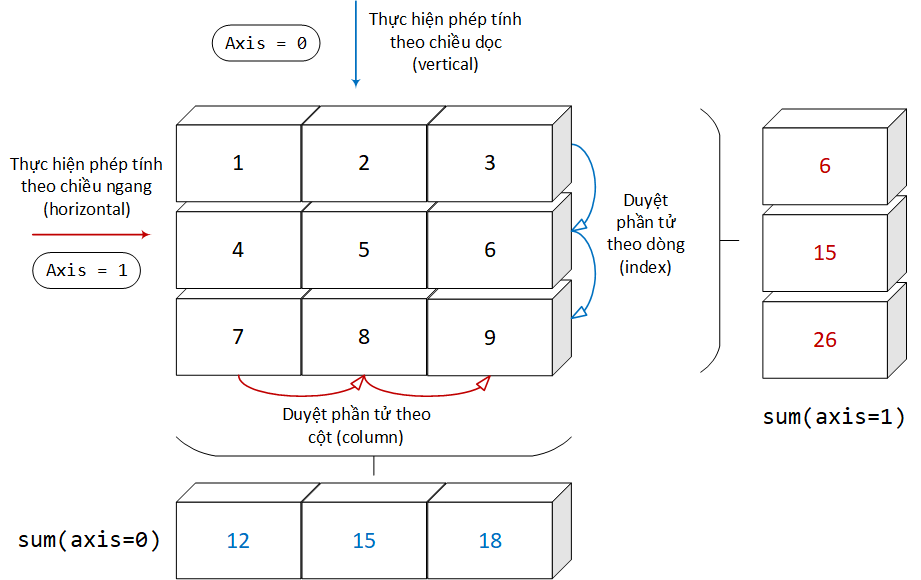

In [128]:
df12.sum(numeric_only=True) # Default axis=0

GPA_10    80.40
GPA_4     32.16
dtype: float64

In [129]:
df12.sum(numeric_only=True, axis=1)

I       11.20
II       9.80
III     11.20
IV      12.88
V       14.00
VI       9.80
VII      9.52
VIII    11.20
IX      12.60
X       10.36
dtype: float64